In [233]:
import pandas as pd
import requests
import json

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


### Removes warnings
import warnings
warnings.filterwarnings('ignore') 

In [234]:
cancer = pd.read_csv(r'data\BreastCancer.csv')

In [235]:
## Change target variable to int
cancer.diagnosis = cancer.diagnosis.replace('M', 1)
cancer.diagnosis = cancer.diagnosis.replace('B', 0)

### Training on all variables (no feature selection)

In [236]:
y = cancer.pop('diagnosis')
X = cancer
X = X.drop('Unnamed: 32', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 12)


In [237]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train) 
knn.score(X_test, y_test)

0.7482517482517482

### Choosing Important Variables

In [238]:
## Feature Selection

cancer = pd.read_csv(r'data\BreastCancer.csv')
cancer.diagnosis = cancer.diagnosis.replace('M', 1)
cancer.diagnosis = cancer.diagnosis.replace('B', 0)

y = cancer['diagnosis']
X = cancer[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 12)


In [239]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train) 
knn.score(X_test, y_test)

0.8531468531468531

### Scaling

In [240]:
from sklearn import preprocessing
import numpy as np


##scaling
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)


scaler = preprocessing.StandardScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)


In [241]:
## Training and testing on scaled data

knn = KNeighborsClassifier()

knn.fit(X_train_scaled, y_train) 
knn.score(X_test_scaled, y_test)

0.9230769230769231

### ---------------------------- Fine Tuning Parameters ----------------------------

In [242]:
grid_params = {'n_neighbors' : [3,5,7,9,11,13,15,17],
               'weights' : ['uniform','distance'],
               'p' : [1, 2]}


knn = KNeighborsClassifier()
#instantiate grid search
gs = GridSearchCV(knn, grid_params, cv=3,)

# fit to training data
g_res = gs.fit(X_train, y_train)


g_res.best_params_

{'n_neighbors': 17, 'p': 1, 'weights': 'distance'}

In [243]:
knn_params = KNeighborsClassifier(n_neighbors = 17, p = 1, weights = 'distance')

knn_params.fit(X_train_scaled, y_train)
knn_params.score(X_test_scaled, y_test)

#same score wtih optimal parameters

0.9300699300699301

In [244]:
from sklearn import metrics

# calculating the accuracy of models with different values of k
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train_scaled, y_train)
    yhat= knn.predict(X_test_scaled)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.9020979 , 0.91608392, 0.91608392, 0.93706294, 0.92307692,
       0.94405594, 0.93706294, 0.93706294, 0.93706294, 0.94405594,
       0.94405594, 0.95104895, 0.95104895, 0.94405594, 0.94405594,
       0.94405594, 0.94405594, 0.93706294, 0.93706294, 0.93006993])

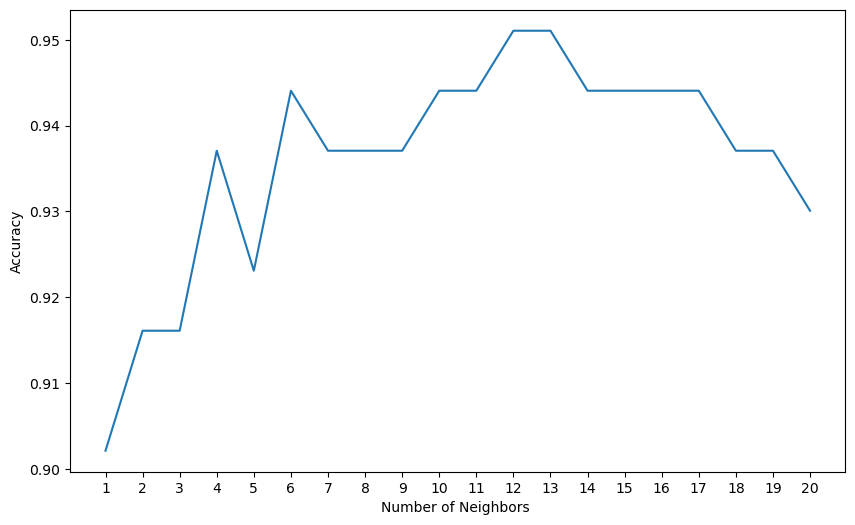

In [245]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [246]:
knn_neighbors = KNeighborsClassifier(n_neighbors = 13)

knn_neighbors.fit(X_train_scaled, y_train)
knn_neighbors.score(X_test_scaled, y_test)

0.951048951048951